In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [3]:
meta = pd.read_csv("../metadata.csv", sep=";")
# df = pd.read_csv("species_data.csv", sep=";").set_index("Sample")
meta

,Unnamed: 0,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,...,Organism,Platform,ReleaseDate,create_date,version,Sample Name,SRA Study,Class,Age,Sex
0,0,SRR15595353,WGS,302,2362150078,PRJNA757365,SAMN20959238,Metagenome or environmental,952983886,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:31:00Z,1,CeD100D2,SRP333874,Celiac,NaN,NaN
1,1,SRR15595352,WGS,302,2289132216,PRJNA757365,SAMN20959239,Metagenome or environmental,907381926,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:30:00Z,1,CeD101D2,SRP333874,Celiac,NaN,NaN
2,2,SRR15595351,WGS,302,3553113050,PRJNA757365,SAMN20959242,Metagenome or environmental,1568323738,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:33:00Z,1,CeD110D2,SRP333874,Celiac,NaN,NaN
3,3,SRR15595350,WGS,302,3170046888,PRJNA757365,SAMN20959281,Metagenome or environmental,1357168858,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:32:00Z,1,CeD110ST,SRP333874,Celiac,NaN,NaN
4,4,SRR15595349,WGS,302,3070539398,PRJNA757365,SAMN20959243,Metagenome or environmental,1241391813,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:35:00Z,1,CeD111D2,SRP333874,Celiac,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,207,SRR22402268,WGS,297,10759128468,PRJNA904924,SAMN31857893,Metagenome or environmental,3550837714,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:29:00Z,1,CMa009,SRP409586,Untreated CD,58.0,female
208,208,SRR22402267,WGS,297,19362472514,PRJNA904924,SAMN31857894,Metagenome or environmental,6516643382,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:26:00Z,1,CMa010,SRP409586,Untreated CD,51.0,female
209,209,SRR22402325,WGS,297,24394619060,PRJNA904924,SAMN31857937,Metagenome or environmental,8219971549,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:25:00Z,1,CMa010b,SRP409586,tCD-TG+,51.0,female
210,210,SRR22402333,WGS,296,10480225436,PRJNA904924,SAMN31857929,Metagenome or environmental,3542622974,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:18:00Z,1,CMa011,SRP409586,tCD-TG-,46.0,male


In [3]:
labels = meta[["Run", "BioProject"]]
labels = labels.rename(columns={"Run": "Sample", "BioProject": "Label"})
labels["Label"] = (labels["Label"] == "PRJNA757365").astype(int)
# df = df.sort_values(by=["Sample"])
labels = labels.sort_values(by=["Sample"])["Label"]

## Standardization

In [7]:
from sklearn import preprocessing

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
df_normalized=(df - df.mean()) / df.std()
df_normalized = min_max_scaler.fit_transform(df)
df_normalized

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.01463558e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.80907365e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.75490589e-01, 0.00000000e+00, 5.43967398e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.35294118e-01, 0.00000000e+00, 2.33232553e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.68371458e-01, 0.00000000e+00, 3.55971724e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## PCA

In [29]:
# You must normalize the data before applying the fit method
pca = PCA(n_components=2)
pca.fit(df_normalized)
X_r = pca.fit(df_normalized).transform(df_normalized)

## Plot

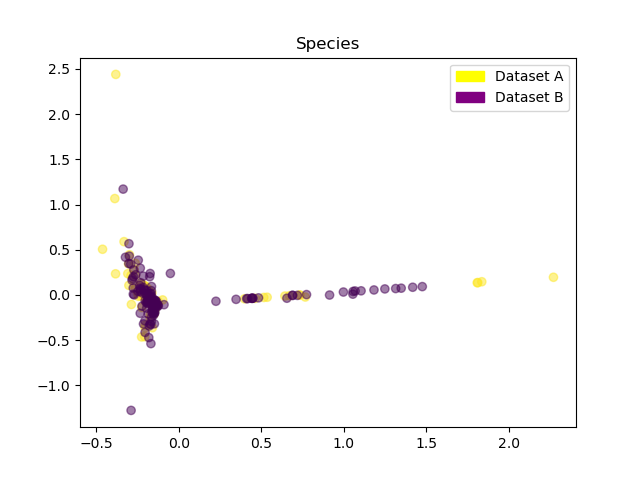

In [30]:
# Plot
plt.figure(dpi=100)
plt.ion()
plt.title('Species')
plt.scatter(X_r[:, 0], X_r[:, 1], c=labels, alpha=0.5)
dataset_a_patch = mpatches.Patch(color='yellow', label='Dataset A')
dataset_b_patch = mpatches.Patch(color='purple', label='Dataset B')
plt.legend(handles=[dataset_a_patch, dataset_b_patch])
plt.savefig('species_pca_verify_datasets.png')
plt.show()

## Correlation matrix

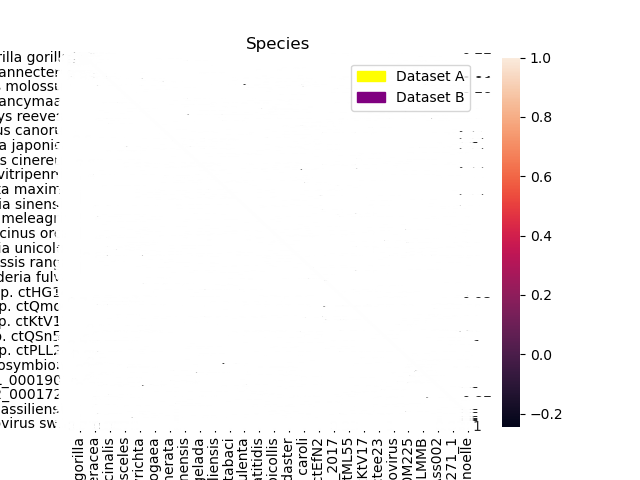

In [31]:
import seaborn as sn
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [32]:
corr_matrix

,Gorilla gorilla,Saccharomyces cerevisiae,Homo sapiens,Chryseobacterium sp. LAM-KRS1,Pongo abelii,Mangifera indica,Cyprinus carpio,Hylobates moloch,Pipra filicauda,Pan troglodytes,...,Methylonatrum kenyense,Candidatus Nardonella dryophthoridicola,Wohlfahrtiimonas larvae,Buchananvirus Sa179lw,Halospina denitrificans,Dehalogenimonas alkenigignens,Swiduovirus swi2,Shuimuvirus IME207,Akiravirus akira,Pseudohongiella spirulinae
Gorilla gorilla,1.000000,-0.061485,0.999369,-0.084663,0.981252,-0.022407,-0.081697,-0.071540,-0.030068,0.994745,...,-0.030238,-0.036103,-0.030238,-0.007825,-0.052043,-0.029791,-0.007825,-0.007825,-0.007825,-0.030238
Saccharomyces cerevisiae,-0.061485,1.000000,-0.061926,-0.019322,-0.059379,-0.009729,0.134531,-0.022966,-0.009729,-0.061149,...,-0.009691,-0.011797,-0.009729,-0.009729,-0.016882,-0.009729,-0.009729,-0.009729,-0.009729,0.768584
Homo sapiens,0.999369,-0.061926,1.000000,-0.084423,0.980769,-0.021880,-0.082148,-0.070787,-0.030181,0.994050,...,-0.030309,-0.035810,-0.030022,-0.006533,-0.052392,-0.030152,-0.006533,-0.006533,-0.006533,-0.030426
Chryseobacterium sp. LAM-KRS1,-0.084663,-0.019322,-0.084423,1.000000,-0.083036,0.194886,-0.037290,0.122442,-0.013780,-0.085595,...,-0.013780,0.591256,-0.013780,-0.013780,-0.023981,-0.013780,-0.013780,-0.013780,-0.013780,-0.013780
Pongo abelii,0.981252,-0.059379,0.980769,-0.083036,1.000000,-0.026313,-0.078318,-0.078597,-0.028954,0.991051,...,-0.028954,-0.034738,-0.028866,-0.021676,-0.050219,-0.028954,-0.021676,-0.021676,-0.021676,-0.028954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dehalogenimonas alkenigignens,-0.029791,-0.009729,-0.030152,-0.013780,-0.028954,-0.004739,-0.012825,-0.013750,-0.004739,-0.030024,...,-0.004739,-0.005754,-0.004739,-0.004739,-0.008248,1.000000,-0.004739,-0.004739,-0.004739,-0.004739
Swiduovirus swi2,-0.007825,-0.009729,-0.006533,-0.013780,-0.021676,-0.004739,-0.012825,-0.013750,-0.004739,-0.017464,...,-0.004739,-0.005754,-0.004739,1.000000,-0.008248,-0.004739,1.000000,1.000000,1.000000,-0.004739
Shuimuvirus IME207,-0.007825,-0.009729,-0.006533,-0.013780,-0.021676,-0.004739,-0.012825,-0.013750,-0.004739,-0.017464,...,-0.004739,-0.005754,-0.004739,1.000000,-0.008248,-0.004739,1.000000,1.000000,1.000000,-0.004739
Akiravirus akira,-0.007825,-0.009729,-0.006533,-0.013780,-0.021676,-0.004739,-0.012825,-0.013750,-0.004739,-0.017464,...,-0.004739,-0.005754,-0.004739,1.000000,-0.008248,-0.004739,1.000000,1.000000,1.000000,-0.004739
